# Trabajo Práctico 2: Ecuaciones Diferenciales - Péndulo

Desarrolle un código que permita resolver por el método de Runge-Kutta 4 la
ecuación diferencial ordinaria a valores iniciales del péndulo para distintos juegos de datos y paso h.

Usando el código, resuelva para el intervalo [0,0 ; 20,0]s los siguientes casos y presente una tabla con los primeros y últimos 5 instantes de tiempo y un gráfico con θ, θ':

## Implementación de RK4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
G = 9.81 # m/s**2

def f(theta, u, b, m, l):
    return -(b / m) * u - (G / l) * np.sin(theta)

def runge_kutta_step(theta, u, h, b, m, l):
    k1_theta = u
    k1_u = f(theta, u, b, m, l)

    k2_theta = u + 0.5 * h * k1_u
    k2_u = f(theta + 0.5 * h * k1_theta, u + 0.5 * h * k1_u, b, m, l)

    k3_theta = u + 0.5 * h * k2_u
    k3_u = f(theta + 0.5 * h * k2_theta, u + 0.5 * h * k2_u, b, m, l)

    k4_theta = u + h * k3_u
    k4_u = f(theta + h * k3_theta, u + h * k3_u, b, m, l)

    theta_next = theta + (h / 6) * (k1_theta + 2 * k2_theta + 2 * k3_theta + k4_theta)
    u_next = u + (h / 6) * (k1_u + 2 * k2_u + 2 * k3_u + k4_u)

    return theta_next, u_next

def runge_kutta_4(theta_0, u_0, h, b, m, l, tiempo):
    num_steps = int(tiempo / h) + 1

    historia_theta = np.zeros(num_steps)
    historia_u = np.zeros(num_steps)
    tiempos = np.zeros(num_steps)

    historia_theta[0] = theta_0
    historia_u[0] = u_0
    tiempos[0] = 0.0

    theta, u = theta_0, u_0

    for i in range(1, num_steps):
        theta, u = runge_kutta_step(theta, u, h, b, m, l)

        historia_theta[i] = theta
        historia_u[i] = u
        tiempos[i] = i * h

    return tiempos, historia_theta, historia_u

In [3]:
def graficar(tiempos, historia_theta, historia_u):
    """
    Grafica ángulo y velocidad angular vs tiempo
    """
    historia_theta_deg = np.rad2deg(historia_theta)
    historia_u_deg = np.rad2deg(historia_u)

    plt.figure(figsize=(10, 6))
    plt.plot(tiempos, historia_theta_deg, 'r-', label='Ángulo')
    plt.plot(tiempos, historia_u_deg, 'b-', label="Velocidad Angular")

    plt.xlabel('t [s]')
    plt.ylabel('θ [°]                θ\' [°/s]')
    plt.legend()

    plt.grid(True)
    plt.show()

## Prueba

A continuación, se testea la implementación con los datos de la consigna para verificar su correcto funcionamiento.

In [4]:
m = 1  # kg
l = 1  # m
b = 1  # Ns/m
h = 0.2  # s
theta_0 = np.deg2rad(30)  # 30 grados en radianes
u_0 = 0.0  # 0 grados/s = 0 radianes/s
tiempo = 20.0  # tiempo total en s

tiempos, historia_theta, historia_u = runge_kutta_4(theta_0, u_0, h, b, m, l, tiempo)

data = {
    "t [s]": tiempos,
    "θ [Rad]": historia_theta,
    "θ' [Rad/s]": historia_u
}

df = pd.DataFrame(data)
df

,t [s],θ [Rad],θ' [Rad/s]
0,0.0,0.523599,0.000000
1,0.2,0.434528,-0.838159
2,0.4,0.216885,-1.259493
3,0.6,-0.034955,-1.182772
4,0.8,-0.229293,-0.715566
...,...,...,...
96,19.2,-0.000030,-0.000052
97,19.4,-0.000033,0.000016
98,19.6,-0.000025,0.000065
99,19.8,-0.000009,0.000083


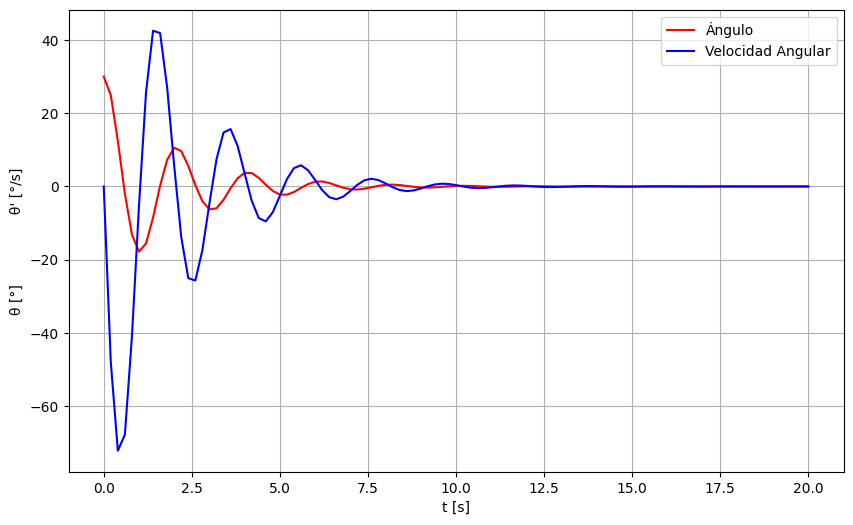

In [5]:
graficar(tiempos, historia_theta, historia_u)

El gráfico se asemeja significativamente al gráfico de ejemplo de la consigna.

## Simulaciones

### Sistema no amortiguado

In [6]:
# Parámetros
m = 1.0  # kg
l = 1.0  # m
b = 0.0  # Ns/m
h = 0.2  # s
theta_0 = np.deg2rad(30)  # 30 grados en radianes
u_0 = 0.0  # 0 grados/s = 0 radianes/s
tiempo = 20.0  # tiempo total en s

In [7]:
tiempos, historia_theta, historia_u = runge_kutta_4(theta_0, u_0, h, b, m, l, tiempo)

In [8]:
data = {
    "t [s]": tiempos,
    "θ [Rad]": historia_theta,
    "θ' [Rad/s]": historia_u
}

df = pd.DataFrame(data)
df

,t [s],θ [Rad],θ' [Rad/s]
0,0.0,0.523599,0.000000
1,0.2,0.428315,-0.924314
2,0.4,0.175710,-1.524073
3,0.6,-0.142463,-1.556916
4,0.8,-0.407010,-1.008782
...,...,...,...
96,19.2,-0.415713,-0.884154
97,19.4,-0.505243,0.012929
98,19.6,-0.410595,0.905003
99,19.8,-0.164778,1.477270


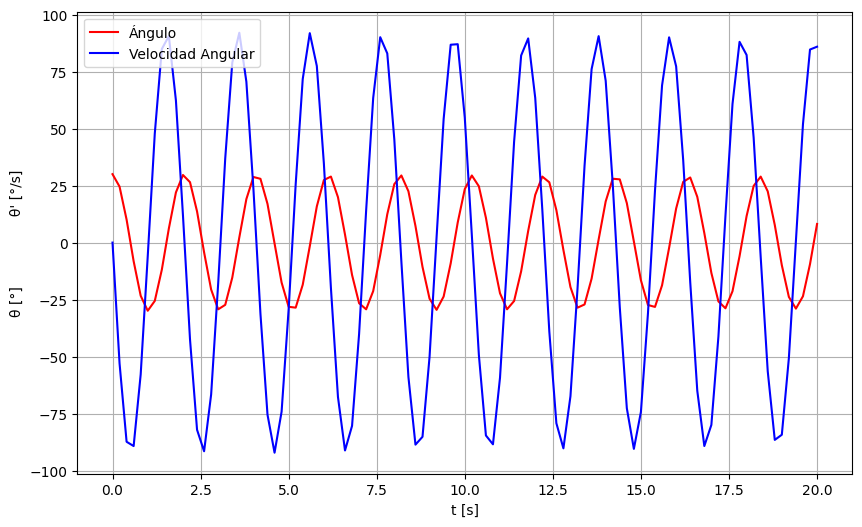

In [9]:
graficar(tiempos, historia_theta, historia_u)

### Sistema con amortiguamiento subcrítico

In [10]:
# Parámetros
m = 1.0  # kg
l = 1.0  # m
b = 0.5  # Ns/m
h = 0.2  # s
theta_0 = np.deg2rad(30)  # 30 grados en radianes
u_0 = np.deg2rad(100)  # 100 grados/s en radianes/s
tiempo = 20.0  # tiempo total en s

In [11]:
tiempos, historia_theta, historia_u = runge_kutta_4(theta_0, u_0, h, b, m, l, tiempo)

In [12]:
data = {
    "t [s]": tiempos,
    "θ [Rad]": historia_theta,
    "θ' [Rad/s]": historia_u
}

df = pd.DataFrame(data)
df

,t [s],θ [Rad],θ' [Rad/s]
0,0.0,0.523599,1.745329
1,0.2,0.745620,0.440432
2,0.4,0.699896,-0.864522
3,0.6,0.425024,-1.794497
4,0.8,0.028800,-2.042088
...,...,...,...
96,19.2,-0.003753,-0.015796
97,19.4,-0.005875,-0.004945
98,19.6,-0.005677,0.006655
99,19.8,-0.003452,0.014749


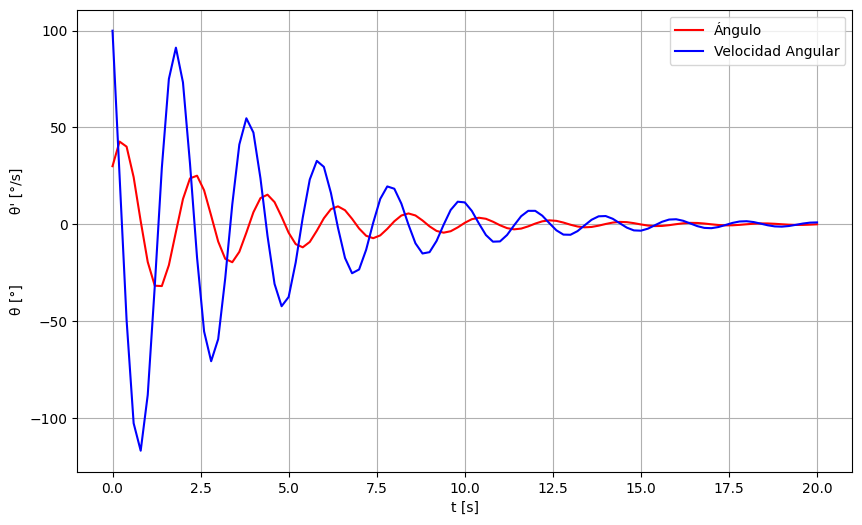

In [13]:
graficar(tiempos, historia_theta, historia_u)